In [8]:
pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - -------------------------------------- 30.7/636.8 kB ? eta -:--:--
     -- ---------------------------------- 41.0/636.8 kB 667.8 kB/s eta 0:00:01
     ----- ------------------------------- 92.2/636.8 kB 751.6 kB/s eta 0:00:01
     ------------- ------------------------ 225.3/636.8 kB 1.1 MB/s eta 0:00:01
     --------------- ---------------------- 256.0/636.8 kB 1.1 MB/s eta 0:00:01
     ------------------------------- ------ 522.2/636.8 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# 1. Sentiment Analysis:

Analyzing sentiment in customer reviews, social media comments, or product feedback to determine whether the sentiment is positive, negative, or neutral.

In [9]:
import numpy as np
import pandas as pd

In [11]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [13]:
data.groupby('sentiment').size()

sentiment
negative    25000
positive    25000
dtype: int64

In [14]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [15]:
data.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [16]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',data['review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [17]:
corpus_dataset=pd.DataFrame(corpus)
corpus_dataset.head()

,0
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [18]:
corpus_dataset['corpus']=corpus_dataset
corpus_dataset.head()

,0,corpus
0,one review mention watch oz episod hook right ...,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...,petter mattei love time money visual stun film...


In [19]:
corpus_dataset=corpus_dataset.drop([0],axis=1)
corpus_dataset.head()

,corpus
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()

In [21]:
x.shape

(1000, 12331)

In [22]:
len(cv.get_feature_names_out())

12331

In [23]:
y=data.iloc[:1000,1].values
y

array(['positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negati

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.naive_bayes import GaussianNB
gauss_clf=GaussianNB()

print('='*70)
print('Training started....  ')
gauss_clf.fit(xtrain,ytrain)
print('\ntesting in progress....')
ypred=gauss_clf.predict(xtest)
print('Predicted class:\n',ypred)
print('='*70)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix:\n',confusion_matrix(ytest,ypred))
print('='*70)
print('Accuracy score:\t',accuracy_score(ytest,ypred))
print('='*70)
print('Classification report:\n',classification_report(ytest,ypred))
print('='*70)

Training started....  

testing in progress....
Predicted class:
 ['negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'positive' 'negati

<Axes: >

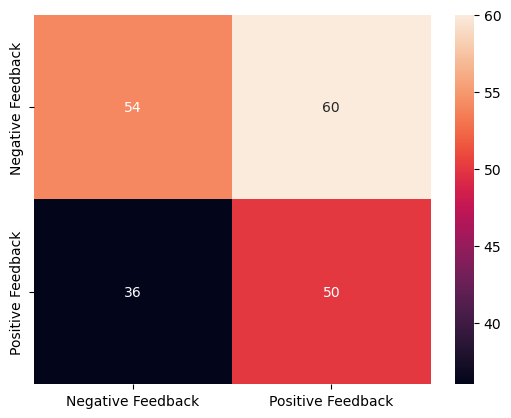

In [25]:
import seaborn as sns

cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,xticklabels=['Negative Feedback','Positive Feedback'],
           yticklabels=['Negative Feedback','Positive Feedback'])

# 2. Text Classification:
Categorizing text documents into predefined categories or classes, such as classifying news articles into topics like sports, politics, technology, etc.

In [26]:
import warnings
warnings.filterwarnings('ignore')

from fuzzywuzzy import process
from fuzzywuzzy import fuzz
from sklearn.datasets import fetch_20newsgroups

In [27]:
newsgroup_train=fetch_20newsgroups(subset='train',shuffle=True)
newsgroup_test = fetch_20newsgroups(subset='test',shuffle=True)

In [28]:
newsgroup_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [29]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pandas as pd
stemmer=SnowballStemmer('english')
np.random.seed(400)

In [30]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
    return result

In [31]:
processed_docs=[]
for doc in newsgroup_train.data:
     x=preprocess(doc)
     x=' '.join(x)
     processed_docs.append(x)
        
print(processed_docs[2])

twilli purdu thoma willi subject question organ purdu univers engin network distribut line folk plus final give ghost weekend start life sooo market machin sooner intend look pick powerbook mayb bunch question hope somebodi answer anybodi know dirt round powerbook introduct expect hear suppos appear summer haven hear anymor access macleak wonder anybodi info anybodi hear rumor price drop powerbook line like one go recent impress display probabl swing disk feel better display look great store good solicit opinion peopl worth take disk size money activ display realiz real subject question play machin store breifli figur opinion somebodi actual use machin daili prove help hellcat perform thank bunch advanc info email post summari news read time premium final corner willi twilli purdu purdu electr engin convict danger enemi truth lie nietzsch


In [32]:
print(processed_docs[0])

lerxst thing subject nntp post host organ univers maryland colleg park line wonder enlighten door sport look late earli call bricklin door small addit bumper separ rest bodi know tellm model engin spec year product histori info funki look mail thank bring neighborhood lerxst


In [33]:
x=process.extract(processed_docs[0],newsgroup_train.target_names)
x

[('rec.sport.baseball', 57),
 ('rec.sport.hockey', 57),
 ('comp.windows.x', 26),
 ('sci.crypt', 26),
 ('soc.religion.christian', 25)]

In [34]:
len(processed_docs)

11314

In [37]:
group=[]
for doc in processed_docs:
    article_cat=[]
    x=process.extract(doc,newsgroup_train.target_names)
    cls_name=x.pop(0)[0]
    article_cat.append(doc)
    article_cat.append(cls_name)
    group.append(article_cat)

KeyboardInterrupt: 

In [36]:
len(group)

11314

In [38]:
df = pd.DataFrame(group, columns=['Article', 'Categories']) 

In [39]:
df.head()

,Article,Categories
0,lerxst thing subject nntp post host organ univ...,rec.sport.baseball
1,guykuo carson washington subject clock poll fi...,rec.sport.baseball
2,twilli purdu thoma willi subject question orga...,alt.atheism
3,jgreen amber green subject weitek organ harri ...,comp.windows.x
4,head harvard jonathan mcdowel subject shuttl l...,misc.forsale


In [40]:
df.shape

(1065, 2)

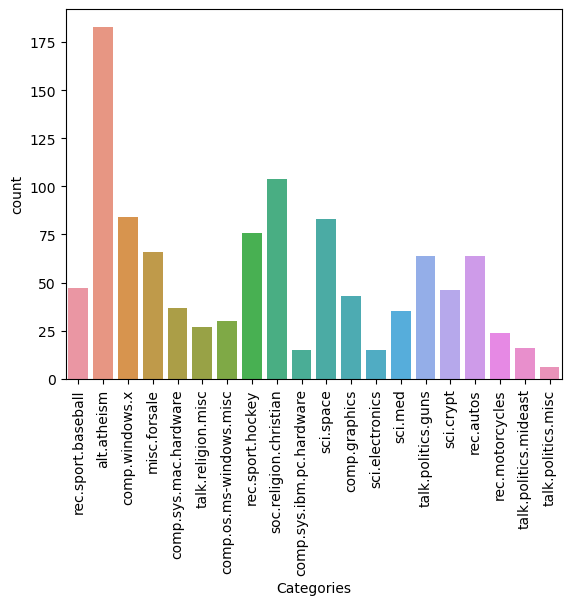

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='Categories', data = df)
plt.xticks(rotation=90)
plt.show()

# 3. Named Entity Recognition (NER)

In [1]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
     ---------------------------------------- 0.1/12.8 MB 3.2 MB/s eta 0:00:04
     - -------------------------------------- 0.3/12.8 MB 2.6 MB/s eta 0:00:05
     - -------------------------------------- 0.6/12.8 MB 3.8 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/12.8 MB 5.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 6.9 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 10.0 MB/s eta 0:00:01
     ------------- -------------------------- 4.4/12.8 MB 12.1 MB/s eta 0:00:01
     ----------------- ---------------------- 5.5/12.8 MB 13.5 MB/s eta 0:00:01
     --------------------- ------------------ 6.7/12.8 MB 15.3 MB/s eta 0:00:01
     ------------------------ --------------- 8.0/12.8 MB 16.4 MB/s eta 0:00:01
     ----------------------------- ---------- 9.5/12.8

In [3]:
import spacy

In [30]:
nlp = spacy.load("en_core_web_sm")
text = 'prakashnani is employed at Mphasis Inc., a company headquartered in Pune'
doc = nlp(text)
for ent in doc.ents:
    print(f"Entity: {ent.text}, Type: {ent.label_}")


Entity: prakashnani, Type: PERSON
Entity: Mphasis Inc., Type: ORG
Entity: Pune, Type: LOC
